In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"")

import pandas as pd
import random
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from kmeans_scratch import KMeansAlgorithm

In [2]:
"""
Load csv into pandas dataframe
"""

flname="../dataset_cluster_warehouse_exp_2.csv"
df = pd.read_csv(flname)
df

,province_name,city_name,district_name,subdistrict_name,lat_long,avg_demand_baseline,demand_target
0,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,"-6.13727,106.7153587",57,85.5
1,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,"-6.1385859,106.7293052",33,49.5
2,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,"-6.1715044,106.7056503",25,37.5
3,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,RAWA BUAYA,"-6.1613339,106.7294525",40,60.0
4,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,GROGOL,"-6.159495,106.7897422",153,229.5
...,...,...,...,...,...,...,...
185,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KAMPUNG BALI,"-6.1852948,106.8073138",45,67.5
186,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KARET TENGSIN,"-6.2076699,106.8075363",240,360.0
187,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON KACANG,"-6.1906249,106.8072637",99,148.5
188,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON MELATI,"-6.1968299,106.8074788",37,55.5


In [3]:
"""
split data lat_long into each lat and long it self.
"""

data_lat = []
data_long = []
for idx, row in df.iterrows():
    point = row['lat_long'].split(',')
    lat = float(point[0])
    long = float(point[1])
    data_lat.append(lat)
    data_long.append(long)

df = df.assign(lat=data_lat, long=data_long)
dataset = df[['city_name', 'district_name','subdistrict_name', 'avg_demand_baseline', 'demand_target', 'lat', 'long']]
dataset

,city_name,district_name,subdistrict_name,avg_demand_baseline,demand_target,lat,long
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,57,85.5,-6.137270,106.715359
1,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,33,49.5,-6.138586,106.729305
2,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,25,37.5,-6.171504,106.705650
3,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,RAWA BUAYA,40,60.0,-6.161334,106.729452
4,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,GROGOL,153,229.5,-6.159495,106.789742
...,...,...,...,...,...,...,...
185,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KAMPUNG BALI,45,67.5,-6.185295,106.807314
186,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KARET TENGSIN,240,360.0,-6.207670,106.807536
187,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON KACANG,99,148.5,-6.190625,106.807264
188,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON MELATI,37,55.5,-6.196830,106.807479


In [4]:
"""
Generate dummy data for rent fee
"""
rent_fee = [random.randint(1000,2000) for _ in range(len(dataset))]
dataset = dataset.assign(rent_fee=rent_fee)
dataset


,city_name,district_name,subdistrict_name,avg_demand_baseline,demand_target,lat,long,rent_fee
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,57,85.5,-6.137270,106.715359,1965
1,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,33,49.5,-6.138586,106.729305,1076
2,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,25,37.5,-6.171504,106.705650,1675
3,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,RAWA BUAYA,40,60.0,-6.161334,106.729452,1912
4,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,GROGOL,153,229.5,-6.159495,106.789742,1748
...,...,...,...,...,...,...,...,...
185,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KAMPUNG BALI,45,67.5,-6.185295,106.807314,1069
186,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KARET TENGSIN,240,360.0,-6.207670,106.807536,1215
187,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON KACANG,99,148.5,-6.190625,106.807264,1132
188,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON MELATI,37,55.5,-6.196830,106.807479,1511


# Converting feature to weight factor phase

In [5]:
wfactor_dataset = dataset[['avg_demand_baseline', 'demand_target', 'rent_fee']]
scaler = MinMaxScaler()
model = scaler.fit(wfactor_dataset)
scaled_data = model.transform(wfactor_dataset)
wfactor_dataset = pd.DataFrame()
wfactor_dataset = wfactor_dataset.assign(
    avg_demand_baseline = scaled_data[:,0],
    demand_target = scaled_data[:,1],
    rent_fee = scaled_data[:,2],
)
wfactor_dataset

,avg_demand_baseline,demand_target,rent_fee
0,0.164557,0.161792,0.966934
1,0.088608,0.087119,0.076152
2,0.063291,0.062228,0.676353
3,0.110759,0.108899,0.913828
4,0.468354,0.460485,0.749499
...,...,...,...
185,0.126582,0.124456,0.069138
186,0.743671,0.731176,0.215431
187,0.297468,0.292470,0.132265
188,0.101266,0.099564,0.512024


# Kmeans Experiment for every weight factor variables

Experiment Feature
- Using 1 feature only (demand)
- Using 2 Feature (demand and avg_demand) balanced
- Using 2 Feature (demand and avg_demand) with priority factor
- Using 2 feature including rent balanced
- Using 2 feature including rent with priority factor
- Using 3 feature balanced
- Using 3 feature with priority factor

In [6]:
from typing import List, Union

def prepare_experiment_1()->List[Union[int, float]]:
    # Using 1 feature only (demand)
    return wfactor_dataset['demand_target'].tolist()

def prepare_experiment_2()->List[Union[int, float]]:
    # Using 2 Feature (demand and avg_demand) balanced
    wfactor = []

    for i,d in wfactor_dataset.iterrows():
        score = d['demand_target'] + d['avg_demand_baseline']
        wfactor.append(score)

    return wfactor

def prepare_experiment_3()->List[Union[int, float]]:
    # Using 2 Feature (demand and avg_demand) with priority factor

    wfactor = []

    for i,d in wfactor_dataset.iterrows():
        score = (d['demand_target'] * 1) + (d['avg_demand_baseline'] * 2)
        wfactor.append(score)

    return wfactor

def prepare_experiment_4()->List[Union[int, float]]:
    # Using 2 feature including rent balanced

    wfactor = []

    for i,d in wfactor_dataset.iterrows():
        score = (d['demand_target'] * 1) + (d['rent_fee'] * -0.5)
        wfactor.append(score)

    return wfactor

def prepare_experiment_5()->List[Union[int, float]]:
    # Using 2 feature including rent with priority factor
    wfactor = []

    for i,d in wfactor_dataset.iterrows():
        score = (d['demand_target'] * 1) + (d['rent_fee'] * 0.5)
        wfactor.append(score)

    return wfactor

def prepare_experiment_6()->List[Union[int, float]]:
    # Using 3 feature balanced

    wfactor = []

    for i,d in wfactor_dataset.iterrows():
        score = (d['demand_target'] * 1) + (d['avg_demand_baseline'] * 1) + (d['rent_fee'] * -0.5)
        wfactor.append(score)

    return wfactor

def prepare_experiment_7()->List[Union[int, float]]:
    # Using 3 feature with priority factor
    wfactor = []

    for i,d in wfactor_dataset.iterrows():
        score = (d['demand_target'] * 1) + (d['avg_demand_baseline'] * 1) + (d['rent_fee'] * 0.5)
        wfactor.append(score)

    return wfactor

n_experiments = 7
weight_experiments = []
for i in range(n_experiments):
    weight_experiments.append(locals()["prepare_experiment_"+str(i+1)]())


# Determining Cluster with elbow method

Experiment ke 1


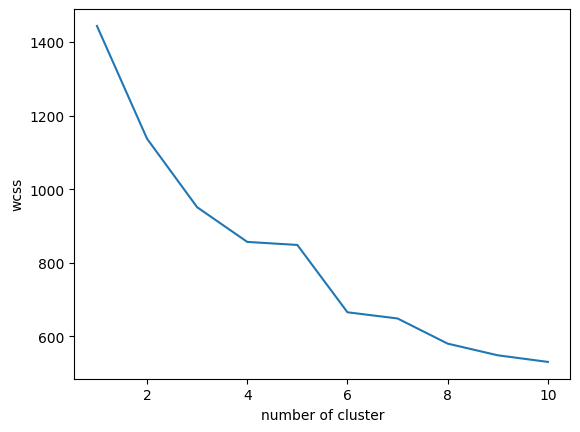


Experiment ke 2


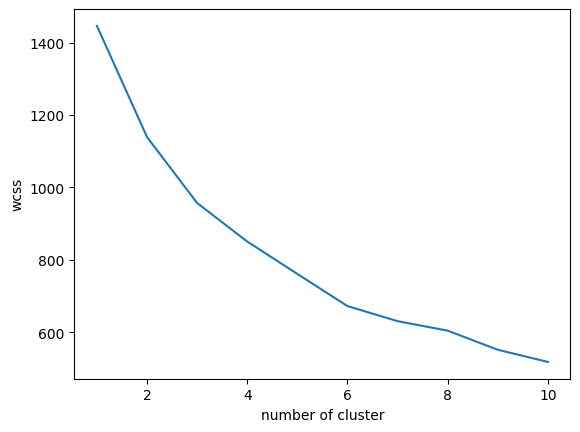


Experiment ke 3


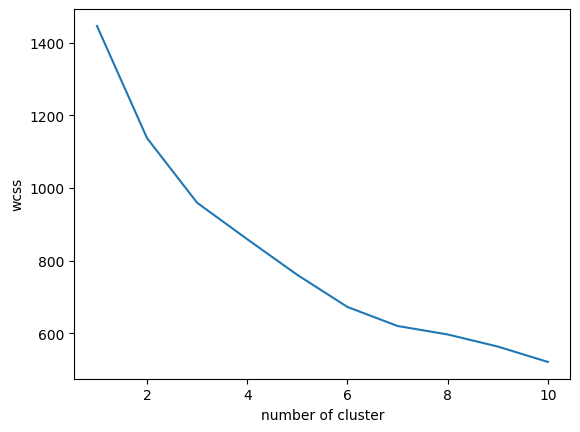


Experiment ke 4


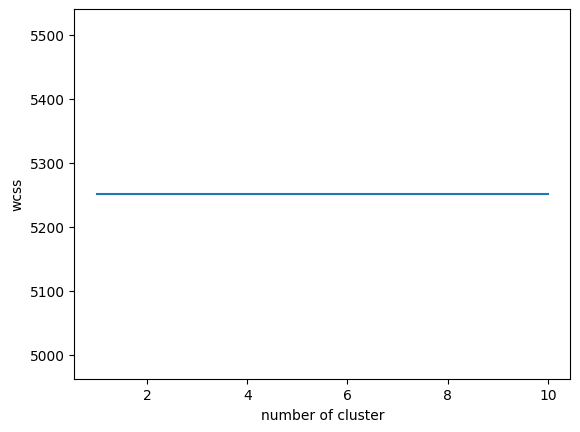


Experiment ke 5


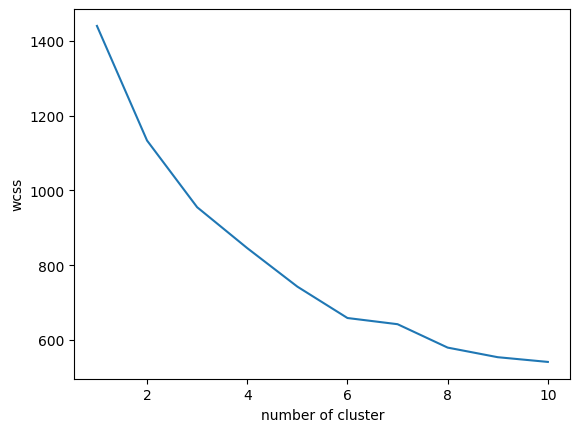


Experiment ke 6


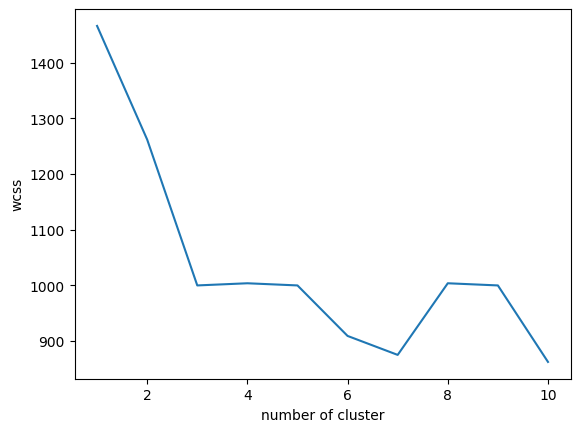


Experiment ke 7


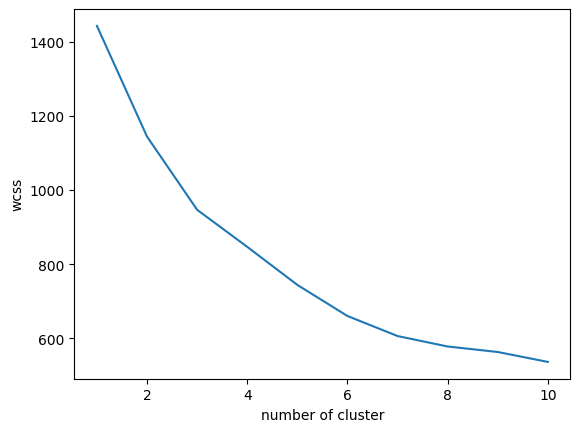

In [7]:
cluster_test = 10
for i in range(n_experiments):
    print("Experiment ke {}".format(i+1))
    wcss = []

    for j in range(1,cluster_test+1):
        kme = KMeansAlgorithm(dataset, j, 'lat', 'long', weight_experiments[i])
        kme.fit(250)
        wcss.append(kme.get_wcss())

    plt.plot(range(1, cluster_test+1), wcss)
    plt.xlabel("number of cluster")
    plt.ylabel("wcss")
    plt.show()
    print("==============================\n")

# K means clustering experiment

Experiment ke 1

==========DATASET=========

                           city_name      district_name  subdistrict_name  \
0    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG  CENGKARENG BARAT   
1    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG  CENGKARENG TIMUR   
2    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG      DURI KOSAMBI   
3    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG        RAWA BUAYA   
4    KOTA ADMINISTRASI JAKARTA BARAT  GROGOL PETAMBURAN            GROGOL   
..                               ...                ...               ...   
185  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KAMPUNG BALI   
186  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG     KARET TENGSIN   
187  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KEBON KACANG   
188  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KEBON MELATI   
189  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG        PETAMBURAN   

     avg_demand_baseline  dema

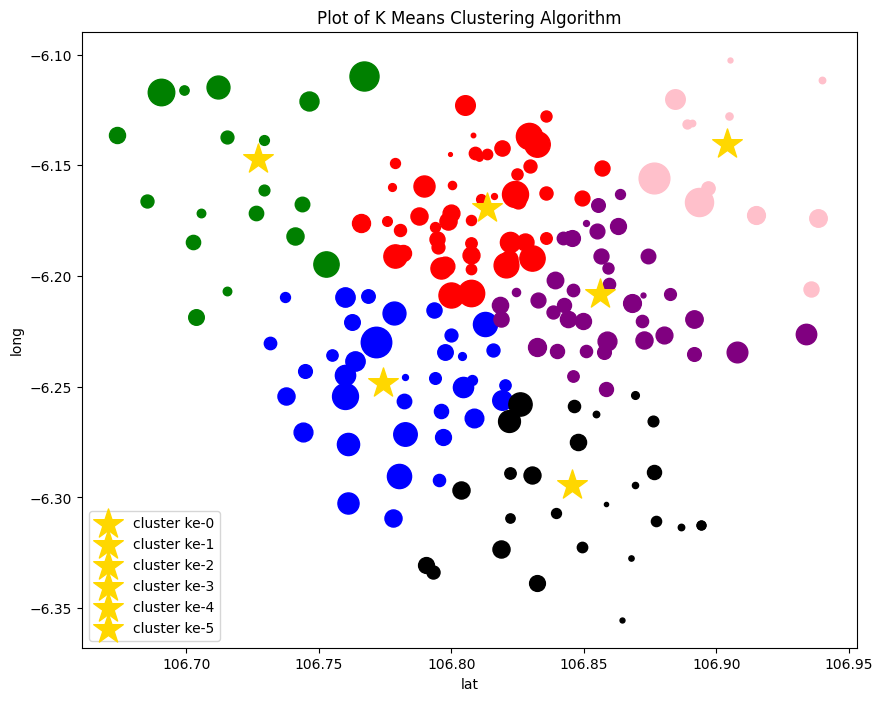


====================END OF EXPERIMENTS====================

Experiment ke 2

==========DATASET=========

                           city_name      district_name  subdistrict_name  \
0    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG  CENGKARENG BARAT   
1    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG  CENGKARENG TIMUR   
2    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG      DURI KOSAMBI   
3    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG        RAWA BUAYA   
4    KOTA ADMINISTRASI JAKARTA BARAT  GROGOL PETAMBURAN            GROGOL   
..                               ...                ...               ...   
185  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KAMPUNG BALI   
186  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG     KARET TENGSIN   
187  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KEBON KACANG   
188  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KEBON MELATI   
189  KOTA ADMINISTRASI JAKARTA PUSAT        TAN

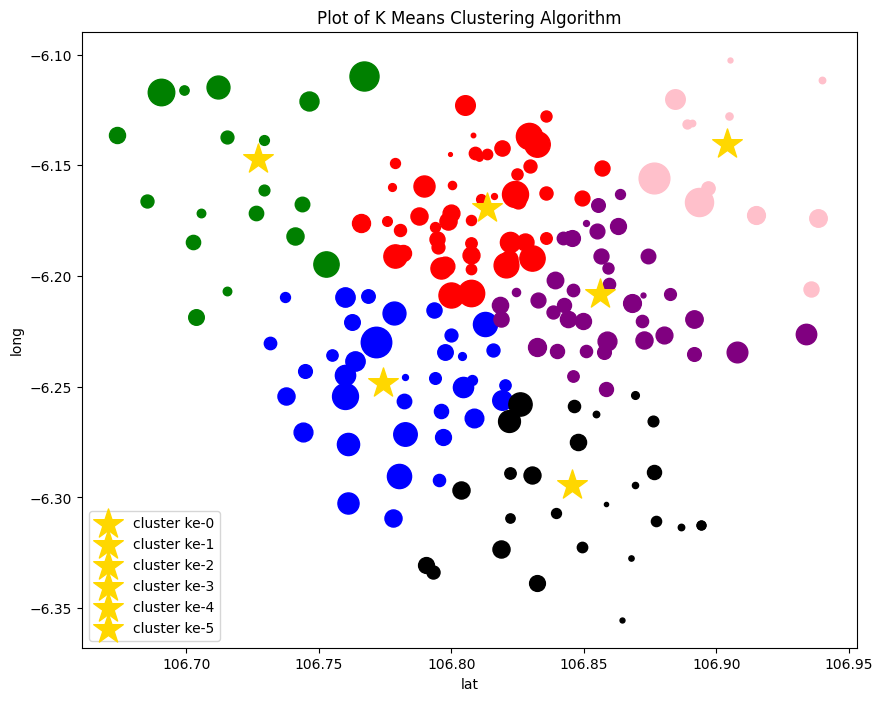


====================END OF EXPERIMENTS====================

Experiment ke 3

==========DATASET=========

                           city_name      district_name  subdistrict_name  \
0    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG  CENGKARENG BARAT   
1    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG  CENGKARENG TIMUR   
2    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG      DURI KOSAMBI   
3    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG        RAWA BUAYA   
4    KOTA ADMINISTRASI JAKARTA BARAT  GROGOL PETAMBURAN            GROGOL   
..                               ...                ...               ...   
185  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KAMPUNG BALI   
186  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG     KARET TENGSIN   
187  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KEBON KACANG   
188  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KEBON MELATI   
189  KOTA ADMINISTRASI JAKARTA PUSAT        TAN

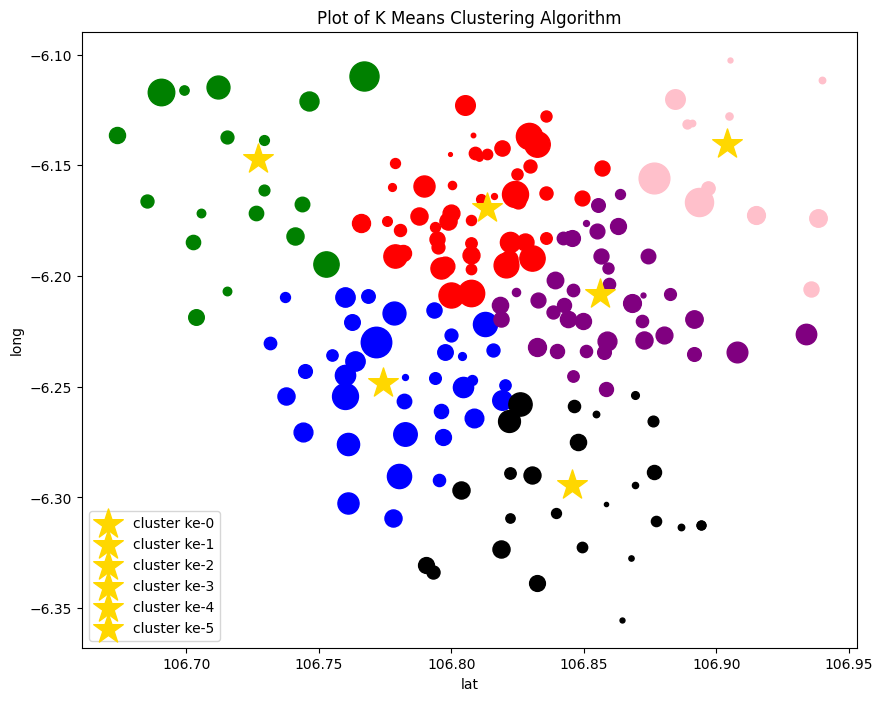


====================END OF EXPERIMENTS====================

Experiment ke 4

==========DATASET=========

                           city_name      district_name  subdistrict_name  \
0    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG  CENGKARENG BARAT   
1    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG  CENGKARENG TIMUR   
2    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG      DURI KOSAMBI   
3    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG        RAWA BUAYA   
4    KOTA ADMINISTRASI JAKARTA BARAT  GROGOL PETAMBURAN            GROGOL   
..                               ...                ...               ...   
185  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KAMPUNG BALI   
186  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG     KARET TENGSIN   
187  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KEBON KACANG   
188  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KEBON MELATI   
189  KOTA ADMINISTRASI JAKARTA PUSAT        TAN

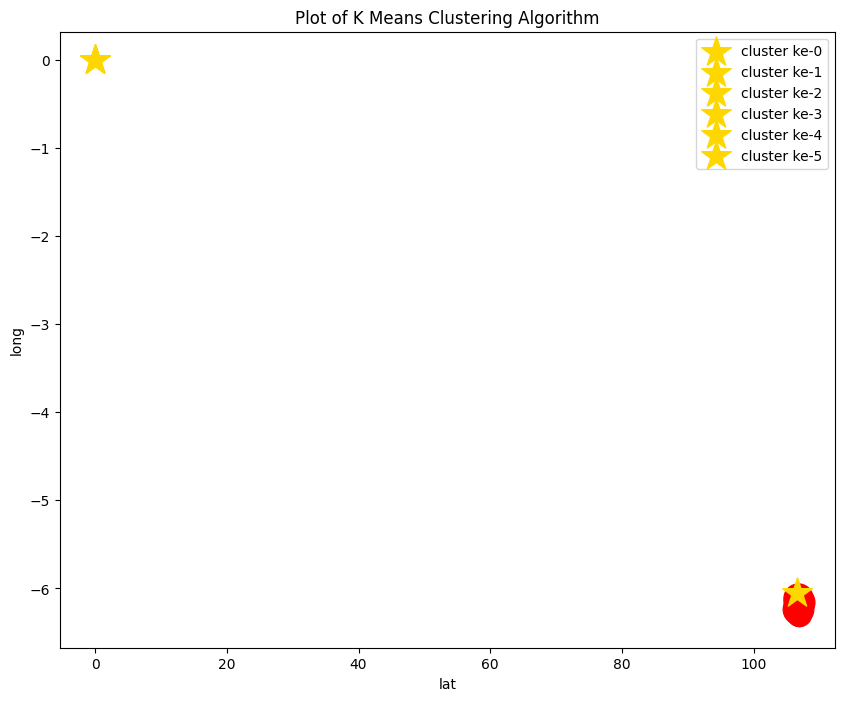


====================END OF EXPERIMENTS====================

Experiment ke 5

==========DATASET=========

                           city_name      district_name  subdistrict_name  \
0    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG  CENGKARENG BARAT   
1    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG  CENGKARENG TIMUR   
2    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG      DURI KOSAMBI   
3    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG        RAWA BUAYA   
4    KOTA ADMINISTRASI JAKARTA BARAT  GROGOL PETAMBURAN            GROGOL   
..                               ...                ...               ...   
185  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KAMPUNG BALI   
186  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG     KARET TENGSIN   
187  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KEBON KACANG   
188  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KEBON MELATI   
189  KOTA ADMINISTRASI JAKARTA PUSAT        TAN

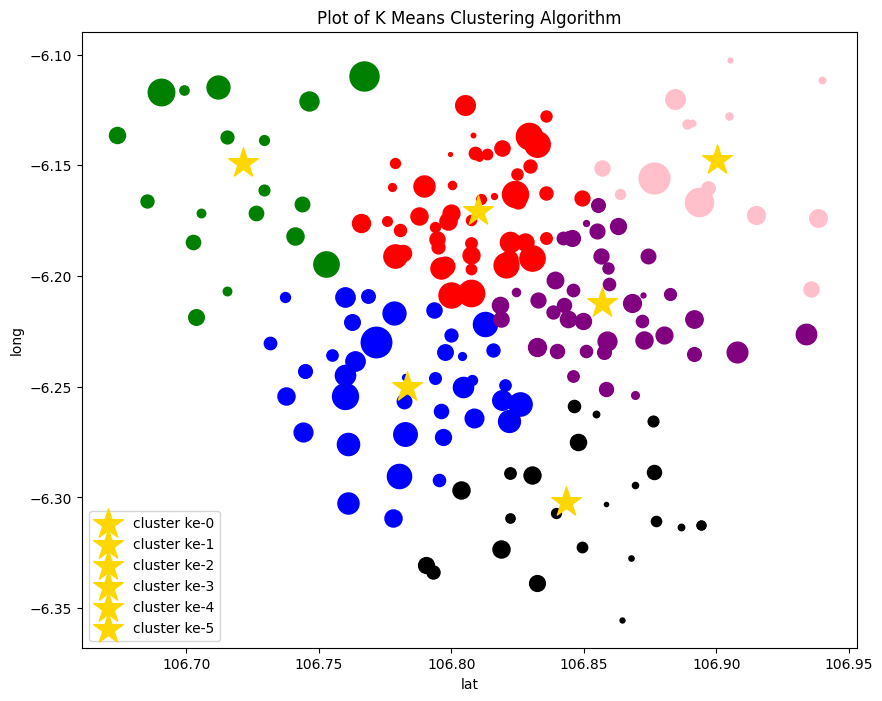


====================END OF EXPERIMENTS====================

Experiment ke 6

==========DATASET=========

                           city_name      district_name  subdistrict_name  \
0    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG  CENGKARENG BARAT   
1    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG  CENGKARENG TIMUR   
2    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG      DURI KOSAMBI   
3    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG        RAWA BUAYA   
4    KOTA ADMINISTRASI JAKARTA BARAT  GROGOL PETAMBURAN            GROGOL   
..                               ...                ...               ...   
185  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KAMPUNG BALI   
186  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG     KARET TENGSIN   
187  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KEBON KACANG   
188  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KEBON MELATI   
189  KOTA ADMINISTRASI JAKARTA PUSAT        TAN

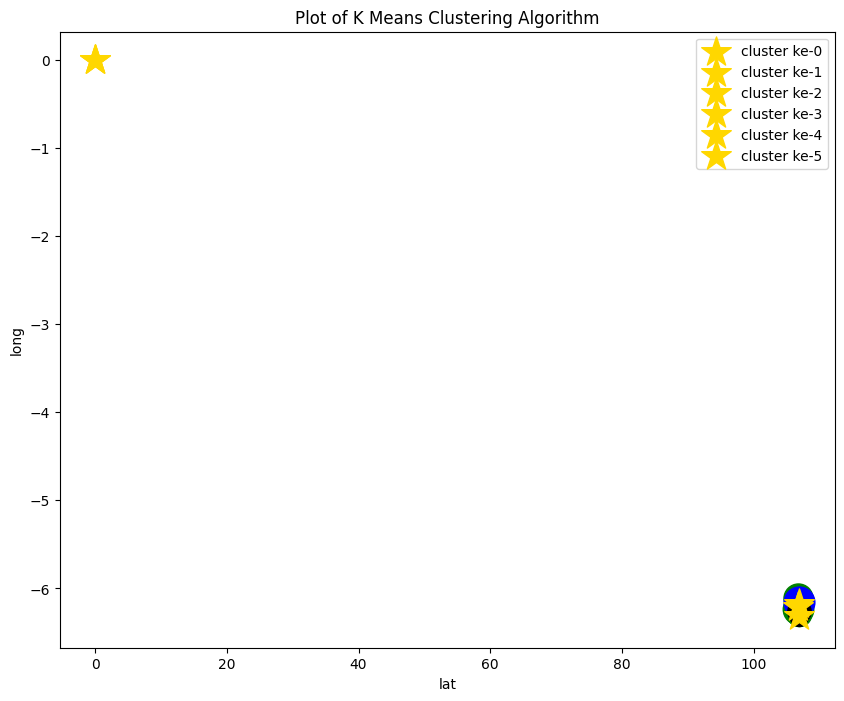


====================END OF EXPERIMENTS====================

Experiment ke 7

==========DATASET=========

                           city_name      district_name  subdistrict_name  \
0    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG  CENGKARENG BARAT   
1    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG  CENGKARENG TIMUR   
2    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG      DURI KOSAMBI   
3    KOTA ADMINISTRASI JAKARTA BARAT         CENGKARENG        RAWA BUAYA   
4    KOTA ADMINISTRASI JAKARTA BARAT  GROGOL PETAMBURAN            GROGOL   
..                               ...                ...               ...   
185  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KAMPUNG BALI   
186  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG     KARET TENGSIN   
187  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KEBON KACANG   
188  KOTA ADMINISTRASI JAKARTA PUSAT        TANAH ABANG      KEBON MELATI   
189  KOTA ADMINISTRASI JAKARTA PUSAT        TAN

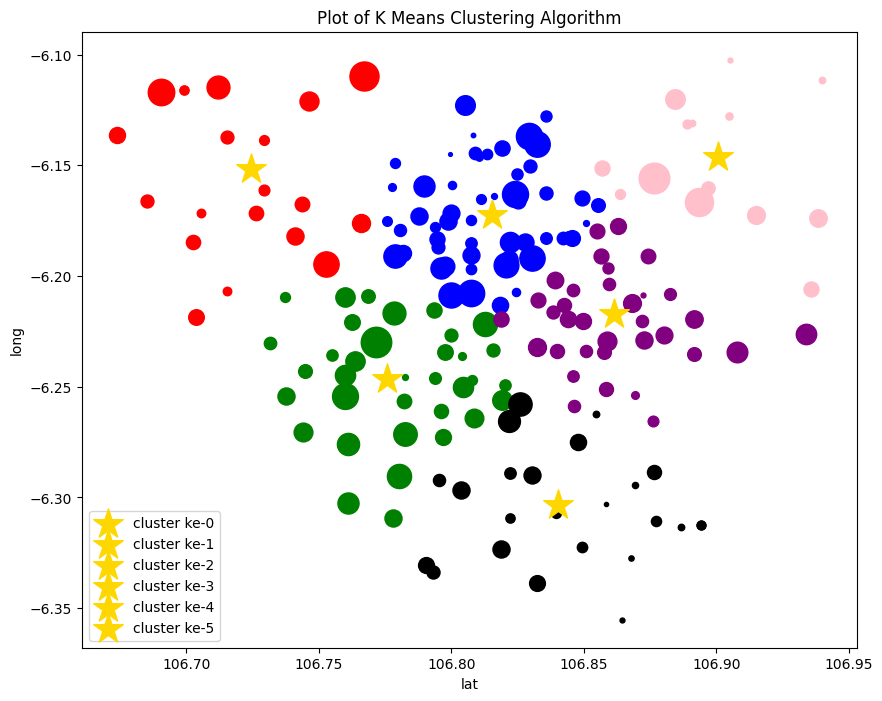


====================END OF EXPERIMENTS====================



In [8]:
n_cluster = 6
legend_multiplier = 20
kmeans = KMeansAlgorithm(dataset, n_cluster, 'lat', 'long')
kmeans.lock_init_centroid(True)
result_dataset = []
for i in range(n_experiments):
    print("Experiment ke {}".format(i+1))

    kmeans.set_weight_factor(weight_experiments[i])
    kmeans.fit(250)
    pred = kmeans.predict()
    final_dataset = dataset.assign(pred = pred)
    result_dataset.append(final_dataset)

    print("\n==========DATASET=========\n")
    print(final_dataset)
    print()

    print("\n==========CENTROID=========\n")
    print(kmeans.centroid)

    kmeans.visualize_kmeans((10,8))
    print("\n==========================================================")
    print("====================END OF EXPERIMENTS====================")
    print("==========================================================\n")



In [9]:
"""
Grab a single dataset result
"""
experiment_no = 1
result_dataset[experiment_no-1]

,city_name,district_name,subdistrict_name,avg_demand_baseline,demand_target,lat,long,rent_fee,pred
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,57,85.5,-6.137270,106.715359,1965,1
1,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,33,49.5,-6.138586,106.729305,1076,1
2,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,25,37.5,-6.171504,106.705650,1675,1
3,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,RAWA BUAYA,40,60.0,-6.161334,106.729452,1912,1
4,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,GROGOL,153,229.5,-6.159495,106.789742,1748,0
...,...,...,...,...,...,...,...,...,...
185,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KAMPUNG BALI,45,67.5,-6.185295,106.807314,1069,0
186,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KARET TENGSIN,240,360.0,-6.207670,106.807536,1215,0
187,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON KACANG,99,148.5,-6.190625,106.807264,1132,0
188,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON MELATI,37,55.5,-6.196830,106.807479,1511,0
